Exercises

Do your work for this exercise in a jupyter notebook named modeling within the regression-exercises repo. Add, commit, and push your work.

In [1]:
# imports:
# tabular data stuff:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data

# modeling methods
# our basic evaluation metric: mean squared error
from sklearn.metrics import mean_squared_error
# from linear_model: LinearRegression (OLS), LassoLars, TweedieRegressor (Generalized Linear Model)
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
# Polynomial Features for polynomial data transformation
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
#split
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

#### 1. Select a dataset with a continuous target variable.

In [2]:
#load swiss data, it lives inside pydataset
swiss = data("swiss")
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


#### 2. Be sure your data is prepared (no missing values, numeric datatypes) and split into samples. 

In [3]:
#check to see if there any nulls
swiss.isnull().sum()

Fertility           0
Agriculture         0
Examination         0
Education           0
Catholic            0
Infant.Mortality    0
dtype: int64

In [23]:
#check data types
swiss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fertility         47 non-null     float64
 1   Agriculture       47 non-null     float64
 2   Examination       47 non-null     int64  
 3   Education         47 non-null     int64  
 4   Catholic          47 non-null     float64
 5   Infant.Mortality  47 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.6+ KB


In [4]:
#split data
train_validate, test = train_test_split(swiss, test_size= .2, random_state = 123)
train,validate = train_test_split(train_validate, test_size= .3, random_state = 123)
train.shape,validate.shape,test.shape

((25, 6), (12, 6), (10, 6))

#### 3. Work through all of the steps outlined in the lesson, from setting the baseline to selected a model and evaluating the final model on your test data.

In [5]:
#Use minmax scaler
#create scaler
scaler = MinMaxScaler()
#fit scaler
scaler.fit(train.drop(columns = "Fertility"))

MinMaxScaler()

In [6]:
#scale(transform) train,valiate and test
X_train = pd.DataFrame(scaler.transform(train.drop(columns = "Fertility")), columns = train.columns[1:])
X_validate = pd.DataFrame(scaler.transform(validate.drop(columns = "Fertility")),columns = validate.columns[1:])
X_test= pd.DataFrame(scaler.transform(test.drop(columns = "Fertility")),columns = test.columns[1:])

In [7]:
#check x train
X_train.head()

,Agriculture,Examination,Education,Catholic,Infant.Mortality
0,0.647561,0.40625,0.290323,0.054508,0.122449
1,0.796341,0.50000,0.258065,0.004508,0.500000
2,0.526829,0.59375,0.354839,0.130533,0.163265
3,0.953659,0.00000,0.032258,0.997029,0.000000
4,0.509756,0.37500,0.225806,0.037910,0.755102


In [8]:
#set up y values
y_train = train.Fertility
y_validate = validate.Fertility
y_test = test.Fertility

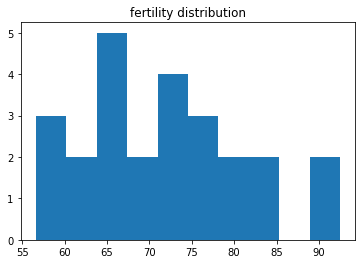

In [9]:
#distribution of y_train
plt.hist(y_train)
plt.title("fertility distribution")
plt.show()

In [10]:
#convert y_train and y_validate to datafram
y_train = pd.DataFrame(y_train)
y_validate=pd.DataFrame(y_validate)

In [11]:
#compute fertility_pred_mean 
fertility_pred_mean = y_train.Fertility.mean()
y_train["fertility_pred_mean"] = fertility_pred_mean
y_validate["fertility_pred_mean"] = fertility_pred_mean


#computer fertility_pred_median
fertility_pred_median = y_train.Fertility.median()
y_train["fertility_pred_median"] = fertility_pred_median
y_validate["fertility_pred_median"] = fertility_pred_median

In [12]:
y_train.head(1)

,Fertility,fertility_pred_mean,fertility_pred_median
Rolle,60.5,71.536,71.7


In [13]:
y_validate.head(1)

,Fertility,fertility_pred_mean,fertility_pred_median
Moudon,65.0,71.536,71.7


In [14]:
#Rmse of fertility predict mean
rmse_train = mean_squared_error(y_train.Fertility, y_train.fertility_pred_mean, squared = False)
rmse_validate = mean_squared_error(y_validate.Fertility,y_validate.fertility_pred_mean, squared = False)

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  9.77 
Validate/Out-of-Sample:  14.78


In [15]:
#Rmse of fertility predict median
rmse_train = mean_squared_error(y_train.Fertility, y_train.fertility_pred_median, squared = False)
rmse_validate = mean_squared_error(y_validate.Fertility,y_validate.fertility_pred_median, squared = False)

print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Median
Train/In-Sample:  9.78 
Validate/Out-of-Sample:  14.83


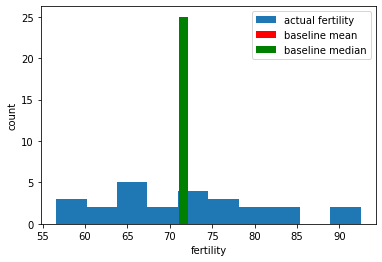

In [16]:
#visualize actual vs baseline
plt.hist(y_train.Fertility, label = "actual fertility")
plt.hist(y_train.fertility_pred_mean,bins =1, color = "red", label = "baseline mean")
plt.hist(y_train.fertility_pred_median, bins = 1, color = "green", label = "baseline median")
plt.xlabel("fertility")
plt.ylabel("count")
plt.legend()
plt.show()

OLS model

In [17]:
#make object
lm = LinearRegression()
#fit the model
lm.fit(X_train,y_train.Fertility)

#predict
y_train["fertility_pred_lm"] = lm.predict(X_train)
y_validate["fertility_pred_lm"] = lm.predict(X_validate)

#evaluate rmse
rmse_train = mean_squared_error(y_train.Fertility,y_train.fertility_pred_lm, squared = False)
rmse_validate = mean_squared_error(y_validate.Fertility,y_validate.fertility_pred_lm, squared = False)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  4.5710430428892685 
Validation/Out-of-Sample:  12.132738217927669


LassoLars model

In [18]:
#make object
lars = LassoLars(alpha=1)
#fit the model
lars.fit(X_train,y_train.Fertility)

#predict
y_train["fertility_pred_lars"] = lars.predict(X_train)
y_validate["fertility_pred_lars"] = lars.predict(X_validate)

#evaluate rmse
rmse_train = mean_squared_error(y_train.Fertility,y_train.fertility_pred_lars, squared = False)
rmse_validate = mean_squared_error(y_validate.Fertility,y_validate.fertility_pred_lars, squared = False)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  8.900787755452747 
Validation/Out-of-Sample:  14.583862842774934


TweedieRegressor(GLM)

In [19]:
#make object
glm = TweedieRegressor(power = 1, alpha=0)
#fit the model
glm.fit(X_train,y_train.Fertility)

#predict
y_train["fertility_pred_glm"] = lars.predict(X_train)
y_validate["fertility_pred_glm"] = lars.predict(X_validate)

#evaluate rmse
rmse_train = mean_squared_error(y_train.Fertility,y_train.fertility_pred_glm, squared = False)
rmse_validate = mean_squared_error(y_validate.Fertility,y_validate.fertility_pred_glm, squared = False)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  8.900787755452747 
Validation/Out-of-Sample:  14.583862842774934


PolynomialFeatures

In [20]:
#make object
pf = PolynomialFeatures(degree =2)
#fit and transform
X_train_degree2 = pf.fit_transform(X_train)

#train X validate
X_validate_degree2 = pf.transform(X_validate)

Linear regression

In [21]:
#create model 
lm2 = LinearRegression(normalize=True)
#fit
lm2.fit(X_train_degree2,y_train.Fertility)

LinearRegression(normalize=True)

In [22]:
#predict train and validate
#predict
y_train["fertility_pred_lm2"] = lm2.predict(X_train_degree2)
y_validate["fertility_pred_lm2"] = lm2.predict(X_validate_degree2)

#evaluate rmse
rmse_train = mean_squared_error(y_train.Fertility,y_train.fertility_pred_lm2, squared = False)
rmse_validate = mean_squared_error(y_validate.Fertility,y_validate.fertility_pred_lm2, squared = False)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  2.589394260668318 
Validation/Out-of-Sample:  26.657466827351666
